<a href="https://colab.research.google.com/github/vicentegonzalez-hub/Portafolio/blob/ETAPA-2/pib_wb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1: Análisis Exploratorio y Limpieza de Datos (EDA)

En esta fase inicial, se procederá a inspeccionar la estructura del dataset crudo extraído de la API del Banco Mundial `wgapi` Version 1.0.2 . El objetivo es identificar inconsistencias, filtrar entidades no deseadas (agregados regionales) y evaluar la calidad de la información antes de cualquier modelamiento.

In [2]:
#instalar biblioteca
%pip install wbgapi
%pip install pandas

In [3]:
#importar biblioteca
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import plotly.express as px
import wbgapi as wb
from google.colab import drive
from datetime import datetime
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
drive.mount('/content/drive')

import sys
sys.path.append('/content/drive/MyDrive/')

import my_func as fn


Mounted at /content/drive


Aqui dejaremos todas las librerias y archivos que necesitaremos para desarrollar las etapas

Se seleccionaron **65 indicadores económicos, sociales y
demográficos** para crear la data inicial .



In [4]:
dicc_indicadores_wb= {
    "NY.GDP.MKTP.PP.KD": "GDP, PPP (constant 2021 international $)",
    "SP.POP.GROW": "Population growth (annual %)",
    "SP.POP.TOTL": "Population, total",
    "SP.POP.TOTL.FE.IN": "Population, female",
    "SP.POP.TOTL.FE.ZS": "Population, female (% of total population)",
    "SP.POP.TOTL.MA.IN": "Population, male",
    "SP.POP.TOTL.MA.ZS": "Population, male (% of total population)",
    "SP.URB.GROW": "Urban population growth (annual %)",
    "SP.URB.TOTL": "Urban population",
    "SP.URB.TOTL.IN.ZS": "Urban population (% of total population)",
    "SP.RUR.TOTL": "Rural population",
    "SP.RUR.TOTL.ZG": "Rural population growth (annual %)",
    "SP.RUR.TOTL.ZS": "Rural population (% of total population)",
    "SL.TLF.TOTL.IN": "Labor force, total",
    "SL.TLF.TOTL.FE.ZS": "Labor force, female (% of total labor force)",
    "SL.UEM.TOTL.FE.NE.ZS": "Unemployment, female (% of female labor force) (national estimate)",
    "SL.UEM.TOTL.FE.ZS": "Unemployment, female (% of female labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.MA.NE.ZS": "Unemployment, male (% of male labor force) (national estimate)",
    "SL.UEM.TOTL.MA.ZS": "Unemployment, male (% of male labor force) (modeled ILO estimate)",
    "SL.UEM.TOTL.NE.ZS": "Unemployment, total (% of total labor force) (national estimate)",
    "SL.UEM.TOTL.ZS": "Unemployment, total (% of total labor force) (modeled ILO estimate)",
    "FP.CPI.TOTL.ZG": "Inflation, consumer prices (annual %)",
    "GC.TAX.EXPT.CN": "Taxes on exports (current LCU)",
    "GC.TAX.EXPT.ZS": "Taxes on exports (% of tax revenue)",
    "NE.EXP.GNFS.KD.ZG": "Exports of goods and services (annual % growth)",
    "NE.EXP.GNFS.KN": "Exports of goods and services (constant LCU)",
    "NE.EXP.GNFS.ZS": "Exports of goods and services (% of GDP)",
    "NV.AGR.TOTL.CD": "Agriculture, forestry, and fishing, value added (current US$)",
    "NV.AGR.TOTL.CN": "Agriculture, forestry, and fishing, value added (current LCU)",
    "NV.IND.MANF.CD": "Manufacturing, value added (current US$)",
    "NV.IND.MANF.CN": "Manufacturing, value added (current LCU)",
    "NV.IND.TOTL.CD": "Industry (including construction), value added (current US$)",
    "NV.IND.TOTL.CN": "Industry (including construction), value added (current LCU)",
    "NV.SRV.TOTL.CD": "Services, value added (current US$)",
    "NV.SRV.TOTL.CN": "Services, value added (current LCU)",
    "GE.EST": "Government Effectiveness: Estimate",
    "NE.CON.GOVT.KN": "General government final consumption expenditure (constant LCU)",
    "NE.CON.GOVT.ZS": "General government final consumption expenditure (% of GDP)",
    "NE.CON.PRVT.CD": "Households and NPISHs Final consumption expenditure (current US$)",
    "NE.CON.PRVT.CN": "Households and NPISHs Final consumption expenditure (current LCU)",
    "GC.DOD.TOTL.CN": "Central government debt, total (current LCU)",
    "GC.DOD.TOTL.GD.ZS": "Central government debt, total (% of GDP)",
    "BM.KLT.DINV.CD.WD": "Foreign direct investment, net outflows (BoP, current US$)",
    "BX.KLT.DINV.WD.GD.ZS": "Foreign direct investment, net inflows (% of GDP)",
    "EG.ELC.LOSS.ZS": "Electric power transmission and distribution losses (% of output)",
    "EG.USE.ELEC.KH.PC": "Electric power consumption (kWh per capita)",
    "EN.GHG.CO2.IP.MT.CE.AR5": "Carbon dioxide emissions from Industrial Processes (Mt CO2e)",
    "SE.PRM.NENR": "School enrollment, primary (% net)",
    "SE.PRM.NENR.FE": "School enrollment, primary, female (% net)",
    "SE.PRM.NENR.MA": "School enrollment, primary, male (% net)",
    "SE.SEC.ENRR": "School enrollment, secondary (% gross)",
    "SE.SEC.ENRR.FE": "School enrollment, secondary, female (% gross)",
    "SE.SEC.ENRR.MA": "School enrollment, secondary, male (% gross)",
    "SE.TER.ENRR": "School enrollment, tertiary (% gross)",
    "SE.TER.ENRR.FE": "School enrollment, tertiary, female (% gross)",
    "SE.TER.ENRR.MA": "School enrollment, tertiary, male (% gross)",
    "SP.DYN.LE00.IN": "Life expectancy at birth, total (years)",
    "SP.DYN.LE00.FE.IN": "Life expectancy at birth, female (years)",
    "SP.DYN.LE00.MA.IN": "Life expectancy at birth, male (years)",
    "EG.CFT.ACCS.ZS": "Access to clean fuels and technologies for cooking (% of population)",
    "EG.CFT.ACCS.RU.ZS": "Access to clean fuels and technologies for cooking, rural (% of rural population)",
    "EG.CFT.ACCS.UR.ZS": "Access to clean fuels and technologies for cooking, urban (% of urban population)",
    "IT.NET.USER.FE.ZS": "Individuals using the Internet, female (% of female population)",
    "IT.NET.USER.MA.ZS": "Individuals using the Internet, male (% of male population)",
    "IT.NET.USER.ZS": "Individuals using the Internet (% of population)",
}

In [5]:
paises_wb_raw=fn.descargar_en_chunks(dicc_indicadores_wb, años= 2023, chunk_size=15)

Descargando bloque 1: ['NY.GDP.MKTP.PP.KD', 'SP.POP.GROW', 'SP.POP.TOTL', 'SP.POP.TOTL.FE.IN', 'SP.POP.TOTL.FE.ZS', 'SP.POP.TOTL.MA.IN', 'SP.POP.TOTL.MA.ZS', 'SP.URB.GROW', 'SP.URB.TOTL', 'SP.URB.TOTL.IN.ZS', 'SP.RUR.TOTL', 'SP.RUR.TOTL.ZG', 'SP.RUR.TOTL.ZS', 'SL.TLF.TOTL.IN', 'SL.TLF.TOTL.FE.ZS']
Descargando bloque 2: ['SL.UEM.TOTL.FE.NE.ZS', 'SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.NE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.UEM.TOTL.NE.ZS', 'SL.UEM.TOTL.ZS', 'FP.CPI.TOTL.ZG', 'GC.TAX.EXPT.CN', 'GC.TAX.EXPT.ZS', 'NE.EXP.GNFS.KD.ZG', 'NE.EXP.GNFS.KN', 'NE.EXP.GNFS.ZS', 'NV.AGR.TOTL.CD', 'NV.AGR.TOTL.CN', 'NV.IND.MANF.CD']
Descargando bloque 3: ['NV.IND.MANF.CN', 'NV.IND.TOTL.CD', 'NV.IND.TOTL.CN', 'NV.SRV.TOTL.CD', 'NV.SRV.TOTL.CN', 'GE.EST', 'NE.CON.GOVT.KN', 'NE.CON.GOVT.ZS', 'NE.CON.PRVT.CD', 'NE.CON.PRVT.CN', 'GC.DOD.TOTL.CN', 'GC.DOD.TOTL.GD.ZS', 'BM.KLT.DINV.CD.WD', 'BX.KLT.DINV.WD.GD.ZS', 'EG.ELC.LOSS.ZS']
Descargando bloque 4: ['EG.USE.ELEC.KH.PC', 'EN.GHG.CO2.IP.MT.CE.AR5', 'SE.PRM.NENR', '

Para empezar haremos un rapido analisis exploratorio de los datos

In [6]:
paises_wb_raw.tail(5)

,country,Country,NY.GDP.MKTP.PP.KD,SL.TLF.TOTL.FE.ZS,SL.TLF.TOTL.IN,SP.POP.GROW,SP.POP.TOTL,SP.POP.TOTL.FE.IN,SP.POP.TOTL.FE.ZS,SP.POP.TOTL.MA.IN,...,SE.TER.ENRR.FE,SE.TER.ENRR.MA,SP.DYN.LE00.FE.IN,SP.DYN.LE00.IN,SP.DYN.LE00.MA.IN,EG.CFT.ACCS.RU.ZS,EG.CFT.ACCS.UR.ZS,IT.NET.USER.FE.ZS,IT.NET.USER.MA.ZS,IT.NET.USER.ZS
261,CEB,Central Europe and the Baltics,4.218704e+12,45.670155,49100893.0,0.111693,100183707.0,51639515.0,51.544825,48544192.0,...,80.939987,56.712559,81.624607,77.896625,74.354109,100.000000,100.000000,NaN,NaN,NaN
262,CSS,Caribbean small states,1.338577e+11,43.965332,1919128.0,0.501131,4519904.0,2293907.0,50.751230,2225997.0,...,NaN,NaN,76.456921,73.171645,69.986624,95.267180,98.879872,NaN,NaN,NaN
263,ARB,Arab World,8.097600e+12,19.141318,132483437.0,2.255866,482105978.0,232702770.0,48.267971,249403208.0,...,34.757931,31.807100,74.418910,72.444678,70.619437,77.839625,93.857501,NaN,NaN,NaN
264,AFW,Africa Western and Central,2.992692e+12,46.355771,212022202.0,2.386204,509398589.0,252899429.0,49.646669,256499160.0,...,NaN,NaN,59.997102,58.855722,57.752356,6.004144,45.206379,33.0,44.0,38.5
265,AFE,Africa Eastern and Southern,3.065002e+12,47.278292,288476515.0,2.519167,750491370.0,379019549.0,50.502852,371471821.0,...,NaN,NaN,67.914632,65.146154,62.395419,10.288154,41.289974,24.8,30.9,27.8


##Filtrado de Países
Al revisar los registros finales, notamos que el dataset ademas de incluir  países individuales, también  incluye otras columnas agrupadoras como "World", "Latin America & Caribbean".
**Por lo tanto** se filtrara el dataframe por los códigos ISO para conservar solo las observaciones que corresponden a países, lo que ayudara a un mejor manejo de datos.

In [7]:
# Seleccionar solamente paises usando código ISO

table_dict = vars(wb.economy.info())
df_paises = pd.DataFrame(table_dict.get('items'))
iso_list = list(df_paises[df_paises['aggregate'] == False]['id'])

In [8]:
#Seleccionar solamente paises.
paises_wb_raw = paises_wb_raw[paises_wb_raw['country'].isin(iso_list)].reset_index(drop = True)

Se hace inspeccion de datos para proceder a la limpieza de estos.

In [9]:
paises_wb_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 67 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        173 non-null    float64
 4   SL.TLF.TOTL.IN           173 non-null    float64
 5   SP.POP.GROW              198 non-null    float64
 6   SP.POP.TOTL              198 non-null    float64
 7   SP.POP.TOTL.FE.IN        198 non-null    float64
 8   SP.POP.TOTL.FE.ZS        198 non-null    float64
 9   SP.POP.TOTL.MA.IN        198 non-null    float64
 10  SP.POP.TOTL.MA.ZS        198 non-null    float64
 11  SP.RUR.TOTL              198 non-null    float64
 12  SP.RUR.TOTL.ZG           189 non-null    float64
 13  SP.RUR.TOTL.ZS           198 non-null    float64
 14  SP.URB.GROW              1

### Decision NA


* Las variables con más del **15% de datos nulos** se eliminaron del dataset, ya que no se recomienda imputar un porcentaje mayor al 15% dado que puede producir sesgo.
* Las variables con menos del **15% de nulos seran** imputadas.

In [10]:
#condicion bolleana
mask_bool=paises_wb_raw.isna().mean()>0.15
#seleccion columnas nulas
drop_columns= paises_wb_raw.isna().mean()[mask_bool].index
#eliminar columnas con alto porcentaje de nulas
paises_wb = paises_wb_raw.drop(columns=drop_columns)

In [12]:
print(f"El  dataframe contiene {paises_wb.shape[0]} filas y {paises_wb.shape[1]} columnas, de las cuales aun posee {len(paises_wb.isna().mean()[paises_wb.isna().mean()>0].index)} que tienen registros nulos bajo al 15%")

El  dataframe contiene 198 filas y 41 columnas, de las cuales aun posee 24 que tienen registros nulos bajo al 15%


In [13]:

print("Las variables con NA menos del 15% son:")
print(paises_wb.isnull().sum()[paises_wb.isnull().sum() > 0])
columnas_numericas = paises_wb.select_dtypes(include=['float64', 'int64']).columns
columnas_a_imputar = paises_wb[columnas_numericas].columns

Las variables con NA menos del 15% son:
SL.TLF.TOTL.FE.ZS          25
SL.TLF.TOTL.IN             25
SP.RUR.TOTL.ZG              9
FP.CPI.TOTL.ZG             23
NE.EXP.GNFS.ZS             29
NV.AGR.TOTL.CD             11
NV.AGR.TOTL.CN             11
NV.IND.MANF.CD             20
SL.UEM.TOTL.FE.ZS          25
SL.UEM.TOTL.MA.ZS          25
SL.UEM.TOTL.ZS             25
BM.KLT.DINV.CD.WD           1
BX.KLT.DINV.WD.GD.ZS        3
GE.EST                      4
NV.IND.MANF.CN             20
NV.IND.TOTL.CD             10
NV.IND.TOTL.CN             10
NV.SRV.TOTL.CD             10
NV.SRV.TOTL.CN             10
EG.CFT.ACCS.ZS             16
EN.GHG.CO2.IP.MT.CE.AR5     8
EG.CFT.ACCS.RU.ZS          16
EG.CFT.ACCS.UR.ZS          16
IT.NET.USER.ZS             21
dtype: int64


#### Imputación

**Imputación por Mediana:**
Para los valores NA que presentan las variables expuestas, se decidio imputar mediante la **mediana** de dichas variables. Se prefirió este metodo debido a que es un metodo simple y eficaz, donde la mediana no se ve afectada por valores extremos.

In [14]:

imputador_mediana = SimpleImputer(strategy='median')
paises_wb_imputado_1 = imputador_mediana.fit_transform(paises_wb[columnas_a_imputar])

paises_wb_imputado_df = pd.DataFrame(
    paises_wb_imputado_1,
    columns=columnas_a_imputar,
    index=paises_wb.index)

paises_wb_final = paises_wb.drop(columns=columnas_a_imputar).join(paises_wb_imputado_df)

Procedemos a verificar el dataframe luego de imputar

In [15]:
print(paises_wb_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country                  198 non-null    object 
 1   Country                  198 non-null    object 
 2   NY.GDP.MKTP.PP.KD        198 non-null    float64
 3   SL.TLF.TOTL.FE.ZS        198 non-null    float64
 4   SL.TLF.TOTL.IN           198 non-null    float64
 5   SP.POP.GROW              198 non-null    float64
 6   SP.POP.TOTL              198 non-null    float64
 7   SP.POP.TOTL.FE.IN        198 non-null    float64
 8   SP.POP.TOTL.FE.ZS        198 non-null    float64
 9   SP.POP.TOTL.MA.IN        198 non-null    float64
 10  SP.POP.TOTL.MA.ZS        198 non-null    float64
 11  SP.RUR.TOTL              198 non-null    float64
 12  SP.RUR.TOTL.ZG           198 non-null    float64
 13  SP.RUR.TOTL.ZS           198 non-null    float64
 14  SP.URB.GROW              1

### Outliers
 Utilizamos el metodo`IQR` con el fin de ver los valores que "se escapan",¿Son errores del dataframe o caracteristicas de este?

In [16]:
columnas_num = paises_wb_final.select_dtypes(include=[np.number]).columns
datos_outliers = []

for col in columnas_num:
    q1 = paises_wb_final[col].quantile(0.25)
    q3 = paises_wb_final[col].quantile(0.75)
    iqr = q3 - q1
    lim_inf = q1 - 1.5 * iqr
    lim_sup = q3 + 1.5 * iqr

    cantidad = ((paises_wb_final[col] < lim_inf) | (paises_wb_final[col] > lim_sup)).sum()
    if cantidad > 0:
        porc = round((cantidad / len(paises_wb_final)) * 100, 2)
        datos_outliers.append([col, cantidad, porc])

# lo deje en dataframe para una mejor visualizacion
df_outliers = pd.DataFrame(datos_outliers, columns=['variable', 'cantidad', '%'])
df_outliers = df_outliers.sort_values(by='cantidad', ascending=False)
print(df_outliers)


                   variable  cantidad      %
21        BM.KLT.DINV.CD.WD        47  23.74
16           NV.AGR.TOTL.CN        38  19.19
27           NV.SRV.TOTL.CN        38  19.19
23           NV.IND.MANF.CN        37  18.69
25           NV.IND.TOTL.CN        37  18.69
28  EN.GHG.CO2.IP.MT.CE.AR5        35  17.68
17           NV.IND.MANF.CD        35  17.68
0         NY.GDP.MKTP.PP.KD        30  15.15
15           NV.AGR.TOTL.CD        29  14.65
2            SL.TLF.TOTL.IN        29  14.65
26           NV.SRV.TOTL.CD        28  14.14
29        EG.CFT.ACCS.UR.ZS        27  13.64
22     BX.KLT.DINV.WD.GD.ZS        27  13.64
24           NV.IND.TOTL.CD        26  13.13
12              SP.URB.TOTL        25  12.63
5         SP.POP.TOTL.FE.IN        22  11.11
9               SP.RUR.TOTL        22  11.11
13           FP.CPI.TOTL.ZG        21  10.61
1         SL.TLF.TOTL.FE.ZS        20  10.10
7         SP.POP.TOTL.MA.IN        20  10.10
4               SP.POP.TOTL        20  10.10
6         

### Resultado Outliers

Despues de aplicar`IQR`, notamoss que varias variables tienen una cantidad considerable de valores atípicos
**¿Son errores?:**
Estos valores no son errores del dataframe, sino que muestran las diferencias que existen entre las economías mundiales (como países muy ricos vs pobres, en que se basan sus economias y diferencias de la moneda local), por lo tanto no se eliminaran. Al momento de la estandarizacion estas diferencias no afectaran los modelos de prediccion.

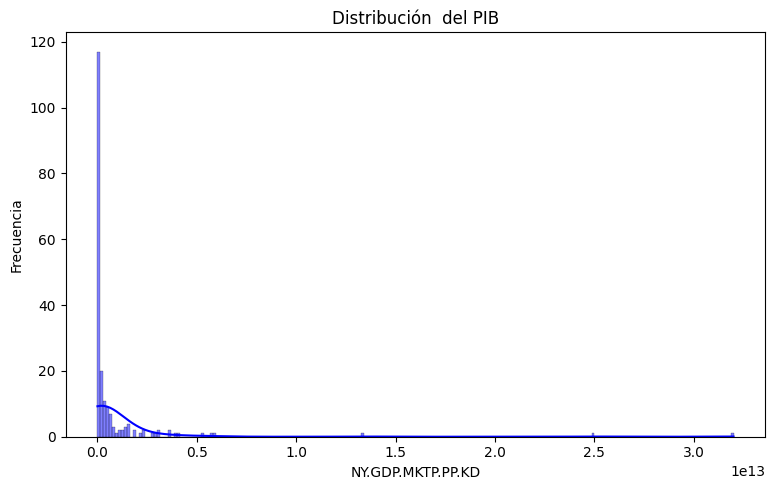

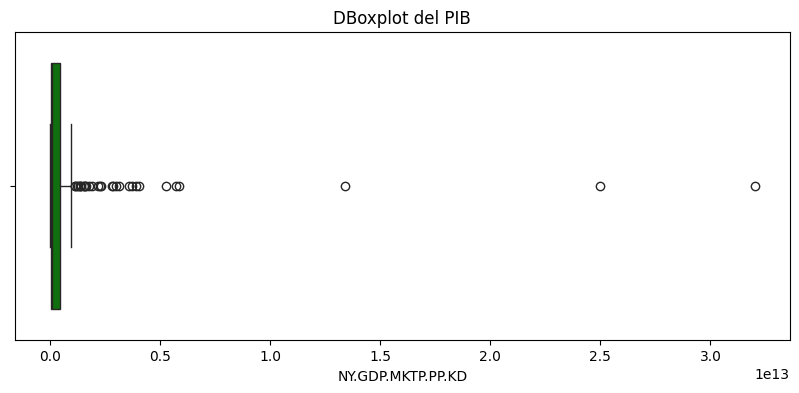

In [17]:
col_pib = 'NY.GDP.MKTP.PP.KD'
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(paises_wb_final[col_pib], kde=True, color='blue')
plt.title(f'Distribución  del PIB')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=paises_wb_final[col_pib], color='green')
plt.title('DBoxplot del PIB' )

plt.show()

### Visualización graficos PIB

Notamos que al observar la distribucion de`NY.GDP.MKTP.PP.KD` (PIB) tanto como en el histograma y el Boxplot, la distribución presenta Outliers muy altos hacia la derecha, mientras que la mayoría de los países se encuentran en niveles de PIB bajos y medios.

In [18]:
#Me apoye de la IA en este punto ya que desconocia este tipo de mapa

# Asegúrate de que el índice sea una columna si contiene los códigos de país
# Si tu índice tiene los códigos (ej. 'ARG', 'CHL'), reseteamos el índice para usarlo
df_mapa = paises_wb_final.copy()
if df_mapa.index.name in ['economy', 'country', 'iso3']:
    df_mapa = df_mapa.reset_index()

# Buscamos la columna que tenga los códigos ISO (asumiendo nombres comunes del WB)
# Ajusta 'economy' si tu columna tiene otro nombre (ej. 'Country Code')
columna_iso = 'economy' if 'economy' in df_mapa.columns else df_mapa.columns[0]

fig = px.choropleth(
    df_mapa,
    locations=columna_iso,        # Columna con códigos ISO (ej: 'CHL', 'USA')
    color='NY.GDP.MKTP.PP.KD',    # Variable del PIB
    hover_name=columna_iso,       # Nombre al pasar el mouse
    color_continuous_scale=px.colors.sequential.Plasma, # Escala de colores
    title='Distribución Mundial del PIB (PPP)',
    labels={'NY.GDP.MKTP.PP.KD': 'PIB (PPP)'}
)

fig.update_layout(geo=dict(showframe=False, showcoastlines=False))
fig.show()

### Distribución mundial del PIB
Al observar el mapa podemos notar las brechas economicas entre paises y continentes, donde Norte america y Europa, presentan mayores valores de PIB Per capita a comparacion de Sur America y Africa.

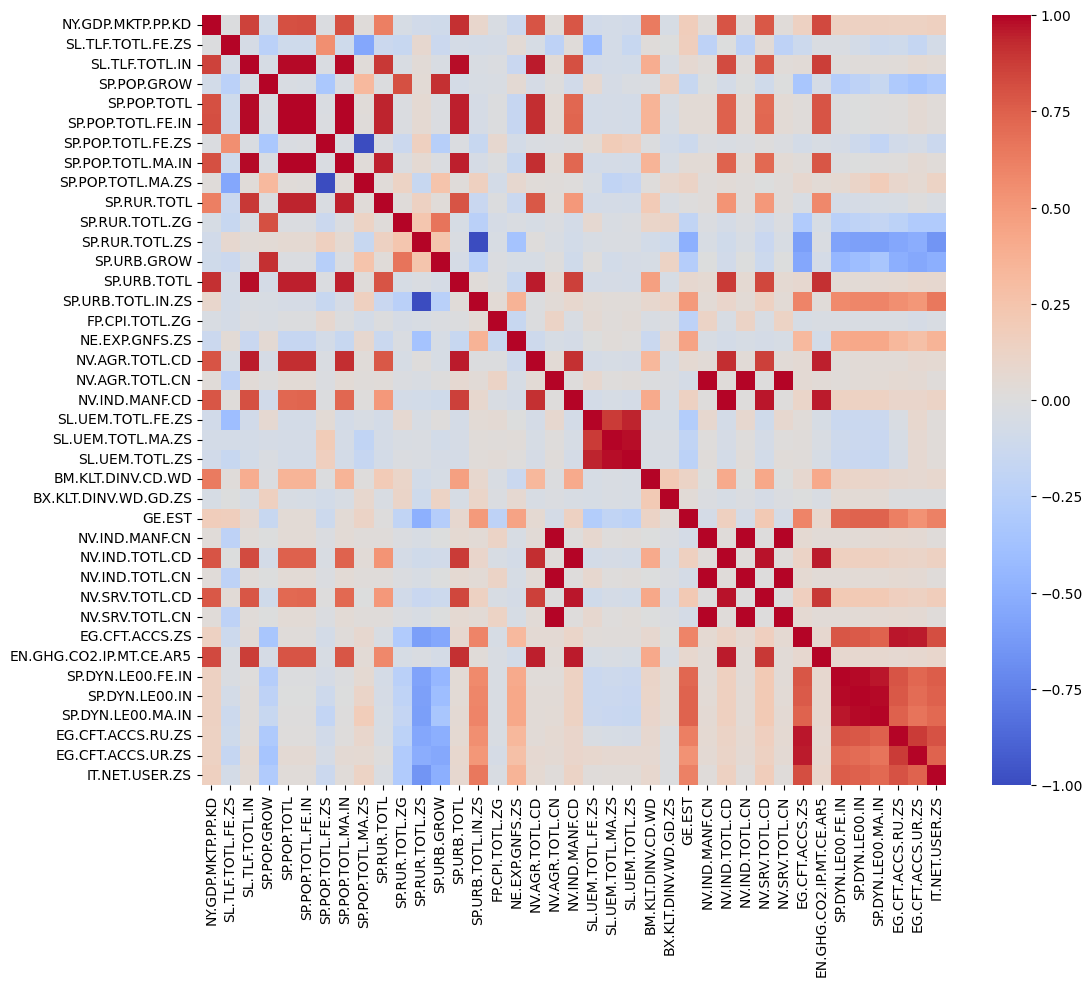

In [19]:

df_numerico = paises_wb_final.select_dtypes(include=[np.number])
corr = df_numerico.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', vmin=-1, vmax=1)

plt.show()


Visualizando la matriz de correlación podemos notar que tenemos un problema de **multicolinealidad severa**,lo que nos indica que tenemos informacion repetida con variables muy similares o redundantes. Por lo tanto, se evidencia la necesidad del uso de PCA.


In [20]:
#Creamos una copia para no afectar al Dataframe anteriormenre utilizado
df_clasificacion = paises_wb_final.copy()
df_clasificacion['Clase_PIB'] = pd.qcut(
    df_clasificacion['NY.GDP.MKTP.PP.KD'],
    q=5,
    labels=['Low', 'Medium-Low', 'Medium', 'Medium-High', 'High'])


## Discretización de la variable PIB

Dado lo solicitado en las intrucciones del trabajo, se  a transformo la variable dependiente `NY.GDP.MKTP.PP.KD` (PIB) de ser continua a ser discreta. Se cree que esto tendra relevancia a la hora de utilizar algoritmos de clasificacion

In [23]:


#Se eliminan las variables a predecir
X_pca = df_clasificacion.drop(['Clase_PIB', 'NY.GDP.MKTP.PP.KD'], axis=1)
X_pca = X_pca.select_dtypes(include=[np.number])
scaler = StandardScaler()
X_estandarizado = scaler.fit_transform(X_pca)

### Estandarización
Para poder aplicar PCA correctamente se estandarizo las variables predictorias, donde se excluyeron las variables a predecir ya que esto haria que el modelo hiciera "trampa" al ya tener lo que se busca

      PC  Varianza  Varianza Acumulada
0    PC1  0.263110            0.263110
1    PC2  0.210908            0.474018
2    PC3  0.109364            0.583382
3    PC4  0.087478            0.670860
4    PC5  0.075738            0.746598
5    PC6  0.044740            0.791338
6    PC7  0.033765            0.825103
7    PC8  0.029673            0.854776
8    PC9  0.028373            0.883149
9   PC10  0.026002            0.909151
10  PC11  0.019797            0.928949
11  PC12  0.016617            0.945566
12  PC13  0.013608            0.959174
13  PC14  0.012624            0.971798
14  PC15  0.007277            0.979076


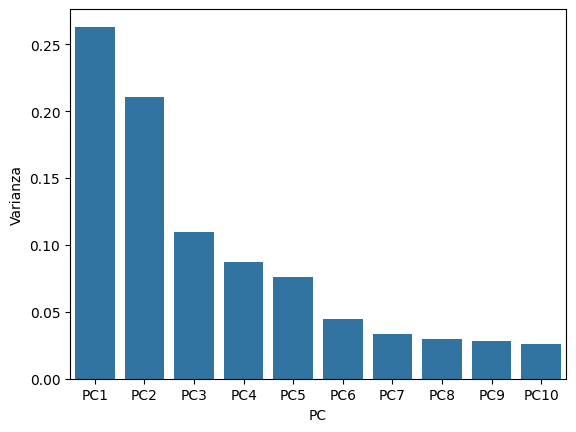

In [24]:
pca = PCA()
pca.fit(X_estandarizado)
varianza = pca.explained_variance_ratio_
varianza_acum = varianza.cumsum()

#Lo dejo en dataframe para una mejor visualizacion
df_var_pca = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(len(varianza))],
    'Varianza': varianza,
    'Varianza Acumulada': varianza_acum})
print(df_var_pca.head(15))
sns.barplot(x='PC', y='Varianza', data=df_var_pca.head(10))
plt.show()

### Elección de Componentes

Al revisar la varianza acumulada, decidi quedarme con los primeros 5 componentes, que explican un 74% de la información original.

Se decidio estos PCA ya que cumplen con el requisito(entre 70% y 90%) sin complicar el modelo innecesariamente. Al usar solo 5 variables, eliminamos gran parte del ruido y resolvemos el problema de la multicolinealidad.

A su vez se incluye un grafico de codo para una mejor visualizacion

In [25]:
n_componentes_seleccionados = 5
pca_final = PCA(n_components=n_componentes_seleccionados)
componentes_principales = pca_final.fit_transform(X_estandarizado)

nombres_columnas = [f'PC{i+1}' for i in range(n_componentes_seleccionados)]

df_pca_final = pd.DataFrame(
    data=componentes_principales,
    columns=nombres_columnas,
    index=df_clasificacion.index)

df_pca_final['Clase_PIB'] = df_clasificacion['Clase_PIB']
print(df_pca_final.head())

        PC1       PC2       PC3       PC4       PC5   Clase_PIB
0 -1.824413 -3.718461 -0.139753  1.201409 -0.206234      Medium
1 -1.848223 -3.861049 -0.202842 -0.814425 -0.276063      Medium
2 -0.841066 -0.284357 -0.042718 -0.170836  0.166311  Medium-Low
3  1.216174  0.301010  0.993765 -0.286240 -2.085039        High
4 -1.649400 -2.790831 -0.277981 -0.867607 -0.669647         Low


### FINALIZACION DE ETAPA 2
Dejamos un nuevo dataframe con solo los PCA que usaremos para  desarrollar en la etapa 3